<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Techniques" data-toc-modified-id="Techniques-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Techniques</a></span></li><li><span><a href="#Dependencies" data-toc-modified-id="Dependencies-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Dependencies</a></span></li><li><span><a href="#Import-CSV-as-pandas-dataframe" data-toc-modified-id="Import-CSV-as-pandas-dataframe-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Import CSV as pandas dataframe</a></span></li><li><span><a href="#Format-data" data-toc-modified-id="Format-data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Format data</a></span><ul class="toc-item"><li><span><a href="#Add-column-for-year" data-toc-modified-id="Add-column-for-year-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Add column for year</a></span></li><li><span><a href="#Add-column-for-centimeters" data-toc-modified-id="Add-column-for-centimeters-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Add column for centimeters</a></span></li></ul></li><li><span><a href="#Plots" data-toc-modified-id="Plots-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Plots</a></span><ul class="toc-item"><li><span><a href="#Plot-cumulative-rise-in-one-line" data-toc-modified-id="Plot-cumulative-rise-in-one-line-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Plot cumulative rise in one line</a></span></li><li><span><a href="#Compressed-X-axis-plotting-technique" data-toc-modified-id="Compressed-X-axis-plotting-technique-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Compressed X-axis plotting technique</a></span></li><li><span><a href="#Plot-cumulative-rise-with-splitted-lines" data-toc-modified-id="Plot-cumulative-rise-with-splitted-lines-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Plot cumulative rise with splitted lines</a></span></li></ul></li></ul></div>

# Sea level change

## Techniques
 - Developped a technique to plot lines with a compressed x-axis

## Dependencies
This notebook uses pandas to store the data, matplotlib.pyplot to plot the data, and numpy to do numerical operations.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Import CSV as pandas dataframe
CSV can be downloaded here: https://datahub.io/core/sea-level-rise#resource-sea-level-rise_zip

In [4]:
df = pd.read_csv("../csv/epa-sea-level_csv.csv", encoding='latin1')

#pop the last row of the dataframe, since this particular row in this particular csv file contains no information
last_row, df = df.iloc[-1], df.iloc[:-1]

## Format data

### Add column for year

In [15]:
df = df.rename(columns={'Year': 'Date'})
df["Year"] = df.apply(lambda x: x["Date"][:4], axis=1)

### Add column for centimeters

In [16]:
df["CSIRO Adjusted Sea Level Centimeter"] = df.apply(lambda x: float(x["CSIRO Adjusted Sea Level"])*2.54, axis=1)

## Plots

### Plot cumulative rise in one line

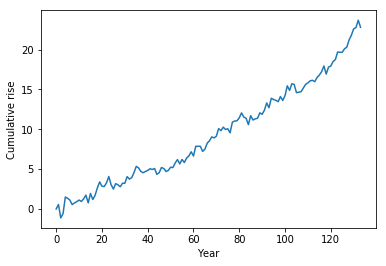

In [11]:
plt.plot(df["CSIRO Adjusted Sea Level Centimeter"])
plt.ylabel("Cumulative rise")
plt.xlabel("Year")
plt.show()

### Compressed X-axis plotting technique
The function 
```python
plotWithCondensedX(data, partitionLength = 10, x_start = 0, x_label = "x", y_label = "y", title = ""):
```
Takes an array, splits it up into partitions, and plots every partition on the same domain. Plots are labeled with the first x value and the last x value of the partition.

In [18]:
def plotWithCondensedX(data, partitionLength = 10, x_start = 0, x_label = "x", y_label = "y", title = "condensedXPlot", figsizex = 6, figsizey = 16, max_yticks = 27):
    sortedData = sorted(data)
    reach = sortedData[-1] - sortedData[0]
    plotData = []
    numberOfPlots = int(len(data)/partitionLength)+1
    for i in range(numberOfPlots):
        plotData.append(data[i*partitionLength:(i+1)*partitionLength + 1])
        
    #if len(data) % partitionLength == 0, then plotData[-1] is an empty list
    if (len(plotData[-1]) == 0):
        plotData.pop()
        numberOfPlots = numberOfPlots -1 
    
    plt.figure(figsize=(figsizex,figsizey))
    for i in range(numberOfPlots):
        plt.plot(plotData[i])
        plt.text(len(plotData[i])-1, plotData[i][-1], str(x_start+i*partitionLength+len(plotData[i])-1))
        plt.text(0, plotData[i][0], str(x_start+i*partitionLength))
    tickInterval = 1+ int(reach/max_yticks)
    plt.yticks(np.arange(int(sortedData[0])-tickInterval, int(sortedData[-1])+2*tickInterval, tickInterval))
    plt.xticks(np.arange(0, partitionLength+1, 1))
    plt.ylabel(y_label)
    plt.xlabel(x_label)
    plt.title(title)
    location = title+".png"
    #plt.savefig(location, dpi=200)
    plt.show()

In [ ]:
#Intuitively show what the condensedX plot does, both plots show the same data
plt.plot(np.arange(0,300))
plt.show()
plotWithCondensedX(np.arange(0,300))

### Plot cumulative rise with splitted lines

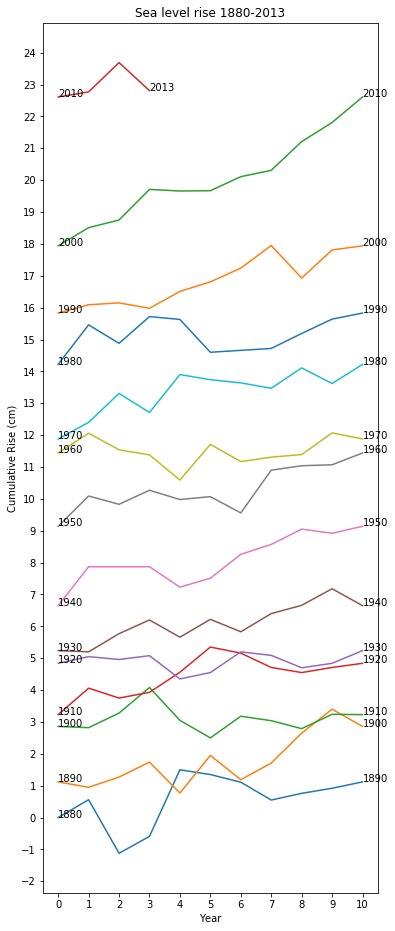

In [17]:
#plotWithCondensedX(df["CSIRO Adjusted Sea Level"].values.tolist(), x_start=1880, x_label = "Year", y_label = "Cumulative Rise (Inches)", title = "Sea level rise 1880-2013")
plotWithCondensedX(df["CSIRO Adjusted Sea Level Centimeter"].values.tolist(), x_start=1880, partitionLength = 10, x_label = "Year", y_label = "Cumulative Rise (cm)", title = "Sea level rise 1880-2013")